In [4]:
# Importing dependencies numpy and keras
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import History, ModelCheckpoint
import _pickle as pickle

history = History()

import matplotlib.pyplot as plt

# load text
filepath = "sonnets.txt"
# filepath = "dickinson.txt"
text = (open(filepath).read()).lower()
poems = text.split("\n\n") # get list of separate poems
# char to int mapping
unique_chars = sorted(list(set(text)))

char_to_int = {}
int_to_char = {}

for i, c in enumerate (unique_chars):
    char_to_int.update({c: i})
    int_to_char.update({i: c})

# preparing input and output dataset
X_data = []
y_data = []


In [6]:
# predict 51st char based off random string of a poem
xlen = 50 # length of each example

for poem in poems:
    for i in range(0, len(poem) - xlen, 1):
        sequence = poem[i:i + xlen]
        label = poem[i + xlen]
        X_data.append([char_to_int[char] for char in sequence])
        y_data.append(char_to_int[label])

num_chars = len(unique_chars)
# reshaping, normalizing and one hot encoding     
X = np.zeros((len(X_data), xlen, num_chars), dtype=np.bool)
y = np.zeros((len(y_data), num_chars), dtype=np.bool)
for i, sentence in enumerate(X_data):
    for n, encoded_char in enumerate(sentence):
        X[i, n, encoded_char] = 1
    y[i, y_data[i]] = 1

# A LSTM network expects the input to be in the form [samples, time steps, features]

In [23]:
# defining the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]))) 
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['categorical_accuracy'])

Epoch 1/20
1720/1720 [==============================] - 124s 72ms/step - loss: 0.6106 - categorical_accuracy: 0.8066
Epoch 2/20
1720/1720 [==============================] - 121s 70ms/step - loss: 0.5822 - categorical_accuracy: 0.8160
Epoch 3/20
1720/1720 [==============================] - 922s 536ms/step - loss: 0.5629 - categorical_accuracy: 0.8206
Epoch 4/20
1720/1720 [==============================] - 135s 79ms/step - loss: 0.5340 - categorical_accuracy: 0.8303
Epoch 5/20
1720/1720 [==============================] - 149s 87ms/step - loss: 0.5125 - categorical_accuracy: 0.8364
Epoch 6/20
1720/1720 [==============================] - 141s 82ms/step - loss: 0.4939 - categorical_accuracy: 0.8429
Epoch 7/20
1720/1720 [==============================] - 145s 85ms/step - loss: 0.4756 - categorical_accuracy: 0.8477
Epoch 8/20
1720/1720 [==============================] - 134s 78ms/step - loss: 0.4574 - categorical_accuracy: 0.8549
Epoch 9/20
1720/1720 [==============================] - 135s 79

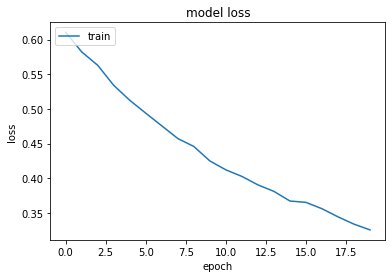

In [27]:
# fitting the model
hist = model.fit(X, y, epochs=20, batch_size=50)

model.summary()
model.save('sonnets.h5')

print(hist.history)

# summarize history for loss
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

For generating of poems

In [35]:
# load text
filepath = "sonnets.txt"
# filepath = "dickinson.txt"
text = (open(filepath).read()).lower()
sonnets = text.split("\n\n") # get list of separate sonnets
# char to int mapping
unique_chars = sorted(list(set(text)))

num_chars = len(unique_chars)
sentence_length = 50
corpus_length = len(text)
from random import randint
char_to_int = {}
int_to_char = {}

for i, c in enumerate (unique_chars):
    char_to_int.update({c: i})
    int_to_char.update({i: c})

modelpath = "sonnets.h5"
# modelpath = "dickinson.h5"

model= load_model(modelpath)


In [37]:
seed = randint(0, corpus_length - sentence_length)
seed_phrase = text[seed:seed + sentence_length]

Xtest = np.zeros((1, sentence_length, num_chars), dtype=np.bool)
for i, character in enumerate(seed_phrase):
    Xtest[0, i, char_to_int[character]] = 1

print("*****************")


test = ""
for i in range(500):
    prediction = np.argmax(model.predict(Xtest, verbose=0))
    #prediction = sample(prediction,temp)
    test += int_to_char[prediction]

    activations = np.zeros((1, 1, num_chars), dtype=np.bool)
    activations[0, 0, prediction] = 1
    Xtest = np.concatenate((Xtest[:, 1:, :], activations), axis=1)


print(seed_phrase + "(*prediction starts here*)" + test)
print("*****************")
# press the play button to generate 500 characters of poetry. it doesnt necessarily make sense

*****************
thy hope, turn back to me,
and play the mother's p(*prediction starts here*)art, kiss me, be kend;
as thou coults my seas, that stall be most show,
the most of my broud heart do i not spend?
nor use the day to fair thou why elfers thee belveng
and such a bath and meal's sweet breast;
better whom from heart, though thou depise,
what beauty's with my dear more abone mad
by deep some what good to be remembered.
the mornot love still true my decemsare thines,
and one all the sweet ornsmention bland,
who all thy beauty like will have ere,
mation i am both against my soul sha
*****************
